Para este ejercicio es necesario entrenar un modelo para detectar actividad de wireShark que corresponda a un ataque ARP Spoofing.



### Marco Teorico:
El Address Resolution Protocol (ARP) es un protocolo fundamental en redes de área local (LAN), cuya función principal es resolver direcciones IP en direcciones físicas (MAC) correspondientes. Cuando un dispositivo dentro de una red desea comunicarse con otro dispositivo conocido por su dirección IP, utiliza ARP para solicitar la dirección MAC asociada. Esta información se almacena en la tabla ARP del sistema durante un período determinado.

#### Vurnelabilidades de ARP:

ARP fue diseñado sin mecanismos de autenticación, lo que implica que cualquier host en la red puede enviar respuestas ARP, incluso si estas no han sido solicitadas. Esta carencia de validación representa una vulnerabilidad crítica que puede ser explotada mediante ataques de suplantación de identidad a nivel de red.

#### Ataques ARP Spoofing:

El ARP Spoofing, también conocido como ARP Poisoning, es una técnica de ataque en la cual un agente malicioso envía respuestas ARP falsificadas a una red local. El objetivo es asociar su dirección MAC con la dirección IP de otro dispositivo legítimo (por ejemplo, un enrutador o servidor), logrando así desviar el tráfico de red hacia su propio dispositivo.

El proceso puede resumirse en los siguientes pasos:

1. El atacante transmite paquetes ARP forjados en la red, reclamando que su dirección MAC corresponde a la IP de un dispositivo confiable.

2. Los dispositivos en la red actualizan sus tablas ARP con esta información errónea.

3. A partir de ese momento, el tráfico destinado a la IP legítima es redirigido al atacante.

Este tipo de ataque permite al adversario realizar acciones como interceptar información sensible, modificar datos en tránsito o denegar servicios, en lo que se clasifica como un ataque Man-In-The-Middle (MITM).


### Conjunto de Datos

Una de las principales dificultades de este ejercicio radica en la obtención de un conjunto de datos adecuado para entrenar el modelo. Si bien es posible generar datos de manera artificial utilizando herramientas como **Wireshark**, esto implicaría la simulación controlada de un ataque ARP Spoofing, además de una clasificación manual precisa del tráfico capturado, lo cual puede resultar complejo y propenso a errores.

No obstante, en la plataforma **Kaggle** se identificó un conjunto de datos previamente recopilado con Wireshark, cuyo propósito está alineado con el de este proyecto. Este conjunto incluye diversos tipos de ataques, aunque el modelo propuesto se entrenará exclusivamente para la detección de **ataques de suplantación ARP (ARP Spoofing)**.
[Cyber Attack Dataset (ARP, SYN, Ping Flood)](https://www.kaggle.com/datasets/aleksandarraki/cyber-attack-dataset-arp-syn-ping-flood)

Sin embargo, tras un análisis preliminar, se observó que este primer dataset presentaba una **desproporción significativa entre tráfico normal y tráfico malicioso**, lo que podría afectar negativamente el rendimiento del modelo, al dificultar su capacidad para aprender patrones representativos del ataque.

Por esta razón, se optó por utilizar un segundo conjunto de datos, también disponible en Kaggle, el cual está **específicamente orientado a ataques de tipo ARP Spoofing**. Este dataset no solo ofrece una mayor cantidad de muestras relevantes, sino que también incluye una estructura más rica en atributos, lo cual resulta beneficioso para el proceso de entrenamiento del modelo de clasificación.

#### Dataset utilizado:

[ARP Spoofing-based MITM Attack Dataset](https://www.kaggle.com/datasets/mizanunswcyber/arp-spoofing-based-mitm-attack-dataset)



### Explorando el dataset:

Acontinuacion vamos a cargar nuestro dataset y a explorar sus caracteristicas. Como forma, columnas, tipos de datos, etc.

In [1]:
# cargamos el archivo CSV desde KaggleHub a una variable de tipo DataFrame de Pandas

import os
import pandas as pd
import kagglehub

path = kagglehub.dataset_download("mizanunswcyber/arp-spoofing-based-mitm-attack-dataset")
print("Direccion de los archivos:", path)

target_filename = "All_Labelled.csv"

target_file_path = os.path.join(path, target_filename)

df = pd.read_csv(target_file_path)

/home/turing/docs/ARP-Spoofing-Clasificator/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Direccion de los archivos: /home/turing/.cache/kagglehub/datasets/mizanunswcyber/arp-spoofing-based-mitm-attack-dataset/versions/1


In [2]:
# Mostramos las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head(2))


Primeras filas del DataFrame:
   src_port  dst_port  protocol  ip_version  vlan_id  tunnel_id  \
0     56343       443         6           4        0          0   
1         0         0         2           4        0          0   

   bidirectional_first_seen_ms  bidirectional_last_seen_ms  \
0                 1.666040e+12                1.666040e+12   
1                 1.666040e+12                1.666040e+12   

   bidirectional_duration_ms  bidirectional_packets  ...  application_name  \
0                        904                     20  ...               TLS   
1                        231                      2  ...              IGMP   

   application_category_name  application_is_guessed  application_confidence  \
0                        Web                       0                       6   
1                    Network                       0                       6   

   requested_server_name                client_fingerprint  \
0     apicom.netatmo.net  bb32cf215dd58fdee

In [3]:
# Mostramos las columnas del DataFrame
print("\nColumnas del DataFrame:")
print(df.columns)


Columnas del DataFrame:
Index(['src_port', 'dst_port', 'protocol', 'ip_version', 'vlan_id',
       'tunnel_id', 'bidirectional_first_seen_ms',
       'bidirectional_last_seen_ms', 'bidirectional_duration_ms',
       'bidirectional_packets', 'bidirectional_bytes', 'src2dst_first_seen_ms',
       'src2dst_last_seen_ms', 'src2dst_duration_ms', 'src2dst_packets',
       'src2dst_bytes', 'dst2src_first_seen_ms', 'dst2src_last_seen_ms',
       'dst2src_duration_ms', 'dst2src_packets', 'dst2src_bytes',
       'bidirectional_min_ps', 'bidirectional_mean_ps',
       'bidirectional_stddev_ps', 'bidirectional_max_ps', 'src2dst_min_ps',
       'src2dst_mean_ps', 'src2dst_stddev_ps', 'src2dst_max_ps',
       'dst2src_min_ps', 'dst2src_mean_ps', 'dst2src_stddev_ps',
       'dst2src_max_ps', 'bidirectional_min_piat_ms',
       'bidirectional_mean_piat_ms', 'bidirectional_stddev_piat_ms',
       'bidirectional_max_piat_ms', 'src2dst_min_piat_ms',
       'src2dst_mean_piat_ms', 'src2dst_stddev_piat_ms

In [4]:

# Mostramos el número de filas y columnas del DataFrame
print("\nNúmero de filas y columnas del DataFrame:")
print(df.shape)


Número de filas y columnas del DataFrame:
(74343, 79)


In [5]:
# Mostramos información general del DataFrame
print("\nInformación general del DataFrame:")
print(df.info())


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74343 entries, 0 to 74342
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   src_port                      74343 non-null  int64  
 1   dst_port                      74343 non-null  int64  
 2   protocol                      74343 non-null  int64  
 3   ip_version                    74343 non-null  int64  
 4   vlan_id                       74343 non-null  int64  
 5   tunnel_id                     74343 non-null  int64  
 6   bidirectional_first_seen_ms   74343 non-null  float64
 7   bidirectional_last_seen_ms    74343 non-null  float64
 8   bidirectional_duration_ms     74343 non-null  int64  
 9   bidirectional_packets         74343 non-null  int64  
 10  bidirectional_bytes           74343 non-null  int64  
 11  src2dst_first_seen_ms         74343 non-null  float64
 12  src2dst_last_seen_ms    

### Generando el modelo

Para entrenar nuestro modelo primero se va a dividir el DataFrame en dos partes: una para entrenamiento y otra para prueba.
Ademas nuestro data set tiene una dimensioalidad muy alta usualmente seria bueno realizar PCA, pues sino tendremos la famosa maldicion de la dimensionalidad, sin embargo utilzaremos una tecnica de machine learning de deep learning que no es tan sensible a la dimensionalidad, por lo que no realizaremos PCA.

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])  # 0: normal, 1: arp_spoofing

cat_cols = list(df.select_dtypes(include='object').columns)
df = pd.get_dummies(df, columns=cat_cols)


# Separar X e y
X = df.drop('Label', axis=1)
y = df['Label']

# Escalar (normalizar) los datos numéricos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

En el anterior pedazo de codio preparamos los datos, al haber muchos valores como string los pasamos a valores numericos, y luego los normalizamos, para que todos los valores esten en el mismo rango, y luego dividimos el dataset en dos partes, una para entrenamiento y otra para prueba. Ademas de los datos Y osea las etiquetas que nos indican si es un ataque o no. Lo que significa que estamos realizando un modelo de clasificacion binaria, ademas de aprendizaje supervisado.

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

gpus = tf.config.list_physical_devices('GPU')
print("GPUs disponibles:", gpus)
if gpus:
    device_name = '/GPU:0'
else:
    device_name = '/CPU:0'

2025-06-06 17:21:30.206695: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-06 17:21:30.296105: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-06 17:21:30.590013: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-06 17:21:31.477608: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


GPUs disponibles: []


2025-06-06 17:21:32.253780: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-06 17:21:32.254209: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
from tensorflow.keras.callbacks import EarlyStopping

with tf.device(device_name):
    # Definir el modelo
    model = models.Sequential([
        layers.Input(shape=(X_train.shape[1],)),  # número de características
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # clasificación binaria
    ])

    # Compilar el modelo
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Entrenar el modelo
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                        validation_split=0.2, callbacks=[early_stop])

Epoch 1/100
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8300 - loss: 0.3964 - val_accuracy: 0.9004 - val_loss: 0.2329
Epoch 2/100
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9140 - loss: 0.2079 - val_accuracy: 0.9147 - val_loss: 0.2124
Epoch 3/100
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9294 - loss: 0.1732 - val_accuracy: 0.9201 - val_loss: 0.2012
Epoch 4/100
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9378 - loss: 0.1520 - val_accuracy: 0.9222 - val_loss: 0.2034
Epoch 5/100
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9437 - loss: 0.1346 - val_accuracy: 0.9227 - val_loss: 0.2216
Epoch 6/100
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9449 - loss: 0.1325 - val_accuracy: 0.9241 - val_loss: 0.2506
Epoch 7/100
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9500 - loss: 0.1204 - val_accuracy: 0.9268 - val_loss: 0.2252
Epoch 8/100
1487/1487 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9514 - loss: 0

Despues de entrenar el modelo, se evaluara su rendimiento con el conjunto de prueba y se mostrara la matriz de confusión.\
Ademas en el entrenamiento vimos que el modelo necesita de pocos epoch para aprender pues despues de los 13 epochs ya cuenta con buena precision y mas alla el modelo estaria realizando overfitting, por lo que se detendra el entrenamiento en el epoch 13.

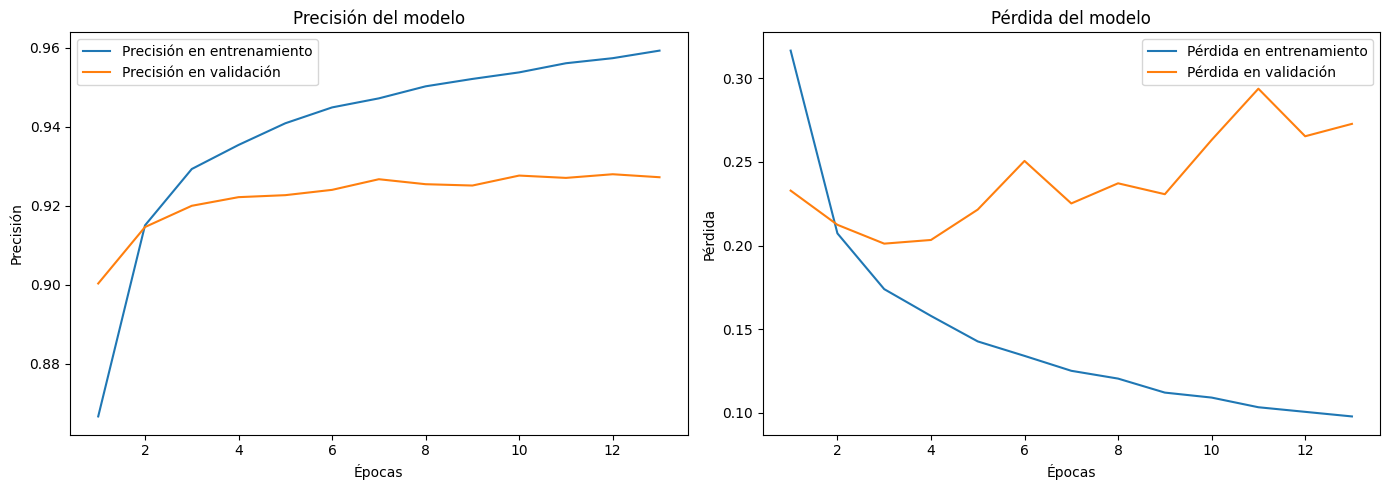

In [12]:
import matplotlib.pyplot as plt

# Extraer datos del entrenamiento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Graficar precisión
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Precisión en entrenamiento')
plt.plot(epochs, val_acc, label='Precisión en validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar pérdida
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Pérdida en entrenamiento')
plt.plot(epochs, val_loss, label='Pérdida en validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()


### Conclusión del Modelo de Detección de ARP Spoofing

Tras el proceso de entrenamiento y evaluación del modelo de clasificación, se observa un rendimiento positivo en la tarea de detección de ataques ARP Spoofing. El modelo alcanzó una **precisión en entrenamiento superior al 96%** y una **precisión en validación cercana al 93%**, lo que indica una capacidad significativa para generalizar el aprendizaje a nuevos datos no vistos.

En cuanto a la función de pérdida, se evidencia una **disminución progresiva en el conjunto de entrenamiento**, lo cual es esperable y deseable. Sin embargo, la pérdida en validación muestra un comportamiento más inestable a partir de ciertas épocas (aumento tras la época 6–7), lo cual podría indicar un inicio de **sobreajuste (overfitting)**. A pesar de ello, la diferencia entre la precisión de entrenamiento y validación no es excesiva, por lo que el modelo aún conserva una buena capacidad de generalización.

El conjunto de datos utilizado, específicamente diseñado para ataques de tipo ARP Spoofing, permitió entrenar el modelo con una proporción adecuada de muestras representativas, lo que favoreció la detección precisa de patrones anómalos asociados a este tipo de ataque de red.

En resumen, el modelo desarrollado presenta un desempeño sólido y puede ser utilizado como herramienta base para sistemas de detección temprana de ataques ARP Spoofing.
